<a href="https://colab.research.google.com/github/jayavardhan18112000/Advertising-Simple-Linear-Regression-/blob/main/Advertising_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
df=pd.read_csv("/content/Advertising.csv")

In [5]:
df.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [6]:
df.info

<bound method DataFrame.info of      Unnamed: 0     TV  radio  newspaper  sales
0             1  230.1   37.8       69.2   22.1
1             2   44.5   39.3       45.1   10.4
2             3   17.2   45.9       69.3    9.3
3             4  151.5   41.3       58.5   18.5
4             5  180.8   10.8       58.4   12.9
..          ...    ...    ...        ...    ...
195         196   38.2    3.7       13.8    7.6
196         197   94.2    4.9        8.1    9.7
197         198  177.0    9.3        6.4   12.8
198         199  283.6   42.0       66.2   25.5
199         200  232.1    8.6        8.7   13.4

[200 rows x 5 columns]>

In [7]:
df.isna().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

<Axes: >

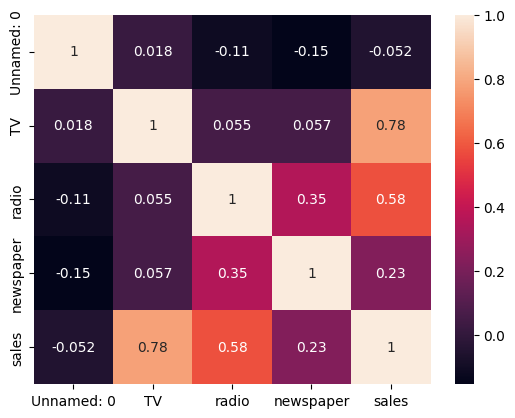

In [8]:
sns.heatmap(df.corr(),annot=True)

In [9]:
df=df.drop('Unnamed: 0',axis=1)

In [10]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


<Axes: >

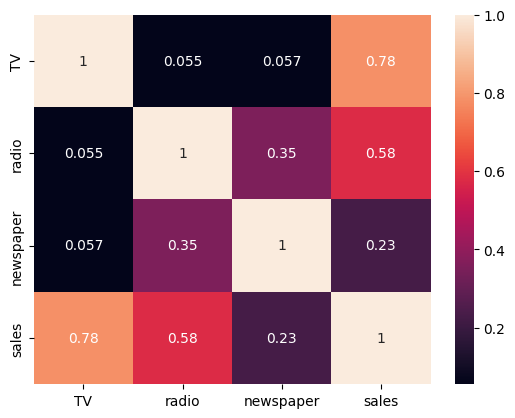

In [11]:
sns.heatmap(df.corr(),annot=True)

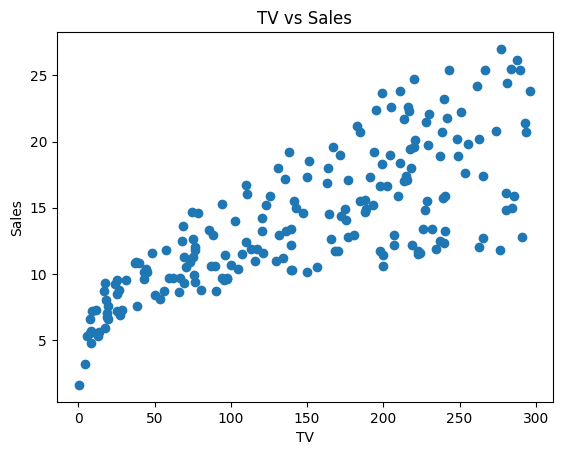

In [12]:
plt.scatter(df['TV'], df['sales'])

plt.xlabel('TV')
plt.ylabel('Sales')
plt.title('TV vs Sales')

plt.show()

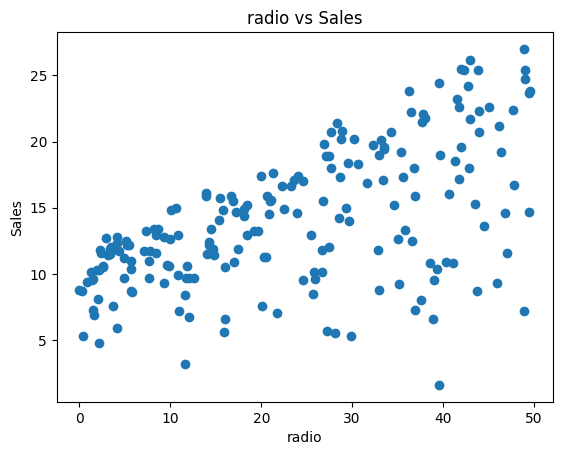

In [13]:
plt.scatter(df['radio'], df['sales'])

plt.xlabel('radio')
plt.ylabel('Sales')
plt.title('radio vs Sales')

plt.show()

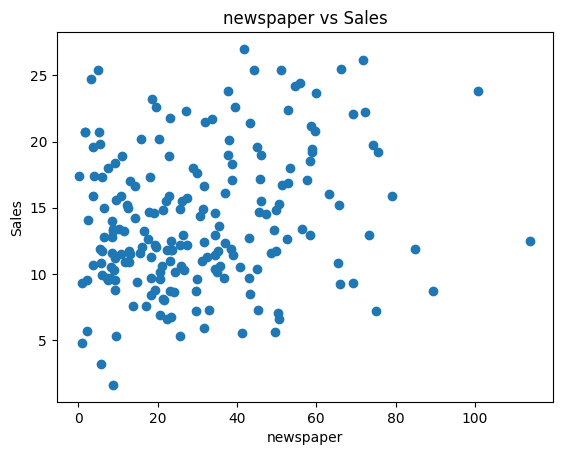

In [14]:
plt.scatter(df['newspaper'], df['sales'])

plt.xlabel('newspaper')
plt.ylabel('Sales')
plt.title('newspaper vs Sales')

plt.show()

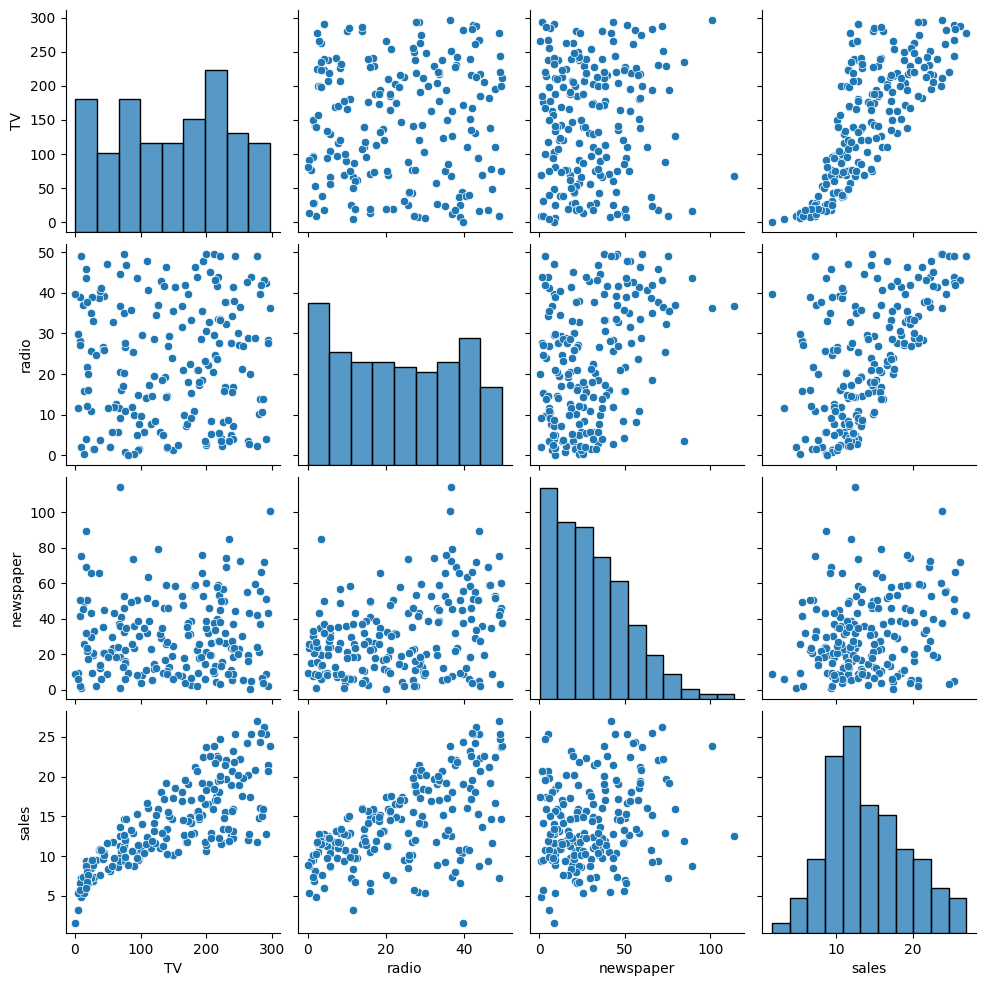

In [15]:
sns.pairplot(df)

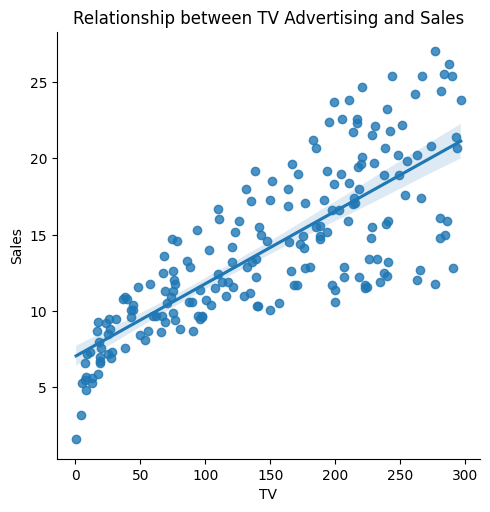

In [16]:
sns.lmplot(x='TV', y='sales', data=df)

# Add labels and a title (optional)
plt.xlabel('TV')
plt.ylabel('Sales')
plt.title('Relationship between TV Advertising and Sales')

# Display the plot
plt.show()

<ipython-input-17-d4e6ffd84cb9>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['sales'], bins=10, kde=True, rug=True)


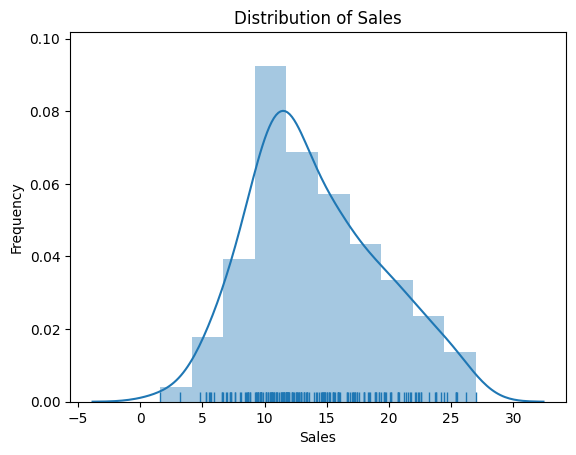

In [17]:
sns.distplot(df['sales'], bins=10, kde=True, rug=True)

# Add labels and a title (optional)
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Distribution of Sales')

# Display the plot
plt.show()


In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x=df.drop('sales',axis=1)
y=df['sales']

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=30)

In [21]:
from sklearn.linear_model import LinearRegression


In [22]:
model = LinearRegression()

# Train the model on the training data
model.fit(x_train, y_train)

LinearRegression()

In [23]:
print(model.intercept_)

3.1534081450084326


In [24]:
print(model.coef_)

[0.0444241  0.17871113 0.00512652]


In [25]:
y_predictions=model.predict(x_test)

In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_predictions)
mse = mean_squared_error(y_test, y_predictions)
r2 = r2_score(y_test, y_predictions)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

Mean Absolute Error (MAE): 1.2654220059554542
Mean Squared Error (MSE): 2.5467060145256797
R-squared (R²): 0.9151734116027949


In [27]:
comparision_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_predictions})
comparision_df.head(10)

,Actual,Predicted
143,10.4,8.995175
81,12.3,14.728191
26,15.0,14.802442
150,16.1,18.297018
124,19.7,19.501496
24,9.7,8.266605
126,6.6,10.711181
142,20.1,19.076426
129,9.7,8.166571
171,14.5,14.439232


<ipython-input-28-bb5bbf895297>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_predictions, bins=10, kde=True, rug=True)


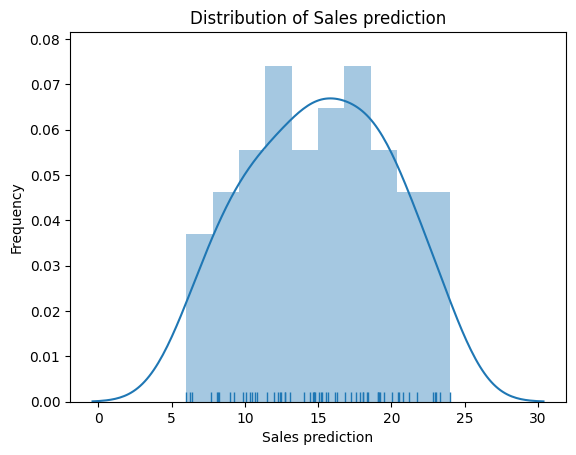

In [28]:
sns.distplot(y_predictions, bins=10, kde=True, rug=True)

# Add labels and a title (optional)
plt.xlabel('Sales prediction')
plt.ylabel('Frequency')
plt.title('Distribution of Sales prediction')

# Display the plot
plt.show()


<Axes: >

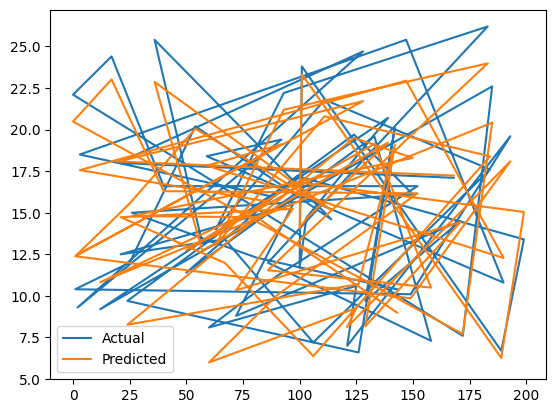

In [29]:
comparision_df.plot()

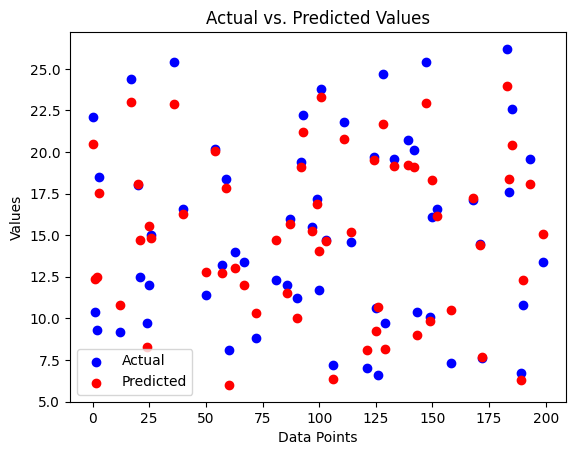

In [30]:
plt.scatter(comparision_df.index, comparision_df['Actual'], label='Actual', color='blue')
plt.scatter(comparision_df.index, comparision_df['Predicted'], label='Predicted', color='red')

plt.xlabel('Data Points')
plt.ylabel('Values')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()